In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
data  = pd.read_csv(r'./creditcard.csv')
df = pd.DataFrame(data)
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
df.shape

(284807, 31)

In [4]:
df['Class'].unique()

array([0, 1], dtype=int64)

In [5]:
count_class = df['Class'].value_counts()
print(count_class)

Class
0    284315
1       492
Name: count, dtype: int64


In [6]:
df.isna().value_counts()  #there is no missing data

Time   V1     V2     V3     V4     V5     V6     V7     V8     V9     V10    V11    V12    V13    V14    V15    V16    V17    V18    V19    V20    V21    V22    V23    V24    V25    V26    V27    V28    Amount  Class
False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False   False    284807
Name: count, dtype: int64

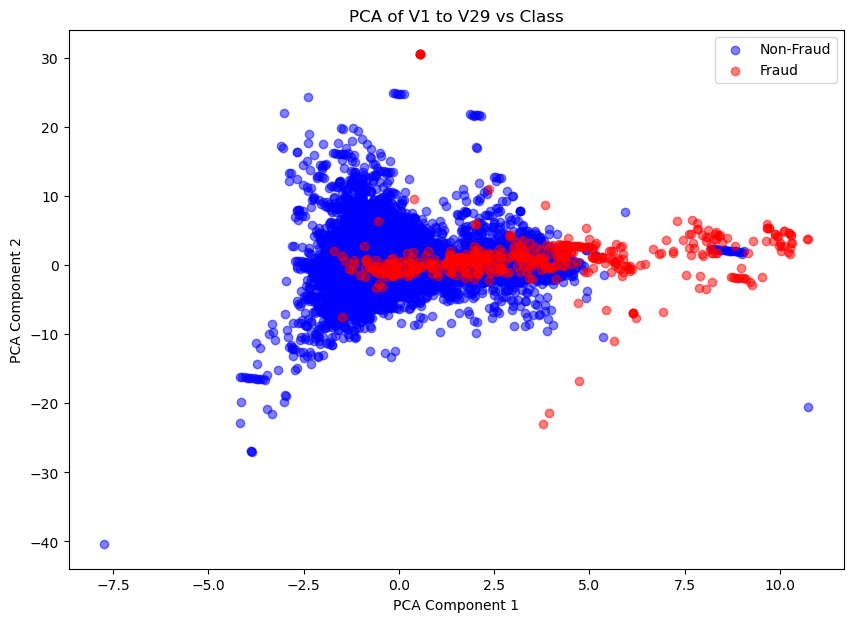

In [7]:
X = df.iloc[:, 1:29]  
y = df['Class']       

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

assert X_pca.shape[0] == y.shape[0], "Mismatched lengths between PCA components and target labels."

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], c='b', label='Non-Fraud', alpha=0.5)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], c='r', label='Fraud', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of V1 to V29 vs Class')
plt.legend()
plt.show()

In [8]:
X = df.iloc[:,:-1]
Y = df['Class']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=50)
print(f'x_train: {len(X_train)}\ny_train: {len(Y_train)}')
print(f'x_test: {len(X_test)}\ny_test:{len(Y_test)}')

x_train: 227845
y_train: 227845
x_test: 56962
y_test:56962


In [9]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train,Y_train)
y_pred = random_forest.predict(X_test)
rfc_accuracy_score = accuracy_score(Y_test,y_pred)
rfc_classification_report = classification_report(Y_test,y_pred)
print('accuracy_score:',rfc_accuracy_score)
print("classification_report:\n",rfc_classification_report)

accuracy_score: 0.9995435553526912
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.93      0.76      0.84        88

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

